Gen 0 Best Fitness: -66.84
Gen 1 Best Fitness: -60.56
Gen 2 Best Fitness: -55.49
Gen 3 Best Fitness: -51.22
Gen 4 Best Fitness: -50.60
Gen 5 Best Fitness: -50.00
Gen 6 Best Fitness: -48.12
Gen 7 Best Fitness: -46.34
Gen 8 Best Fitness: -46.25
Gen 9 Best Fitness: -44.87
Gen 10 Best Fitness: -44.87
Gen 11 Best Fitness: -44.38
Gen 12 Best Fitness: -44.38
Gen 13 Best Fitness: -41.45
Gen 14 Best Fitness: -41.45
Gen 15 Best Fitness: -40.15
Gen 16 Best Fitness: -40.15
Gen 17 Best Fitness: -38.33
Gen 18 Best Fitness: -37.07
Gen 19 Best Fitness: -36.61
Gen 20 Best Fitness: -34.82
Gen 21 Best Fitness: -34.82
Gen 22 Best Fitness: -34.26
Gen 23 Best Fitness: -34.26
Gen 24 Best Fitness: -34.26
Gen 25 Best Fitness: -34.26
Gen 26 Best Fitness: -34.26
Gen 27 Best Fitness: -34.00
Gen 28 Best Fitness: -32.61
Gen 29 Best Fitness: -30.95
Gen 30 Best Fitness: -30.68
Gen 31 Best Fitness: -30.68
Gen 32 Best Fitness: -29.76
Gen 33 Best Fitness: -29.76
Gen 34 Best Fitness: -28.75
Gen 35 Best Fitness: -28.75
Ge

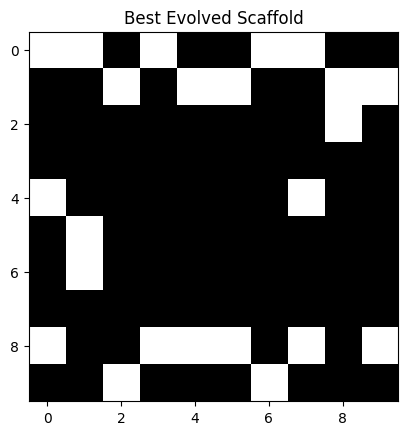

In [1]:
# Scaffold Evolution Example (Genetic Algorithm)

import numpy as np
import matplotlib.pyplot as plt
import random

# Define scaffold as a 2D grid (1 = solid, 0 = hole)
def generate_scaffold(shape=(10, 10)):
    return np.random.choice([0, 1], size=shape)

# Fitness: how close vibration frequency is to 100Hz (simulated)
def calculate_fitness(scaffold):
    mass = np.sum(scaffold)
    stiffness = np.sum(np.abs(np.gradient(scaffold)[0])) + 1
    frequency = (stiffness / mass) * 50  # Fake formula for resonance
    target_frequency = 100  # Hz
    return -abs(frequency - target_frequency)  # closer to 0 is better

# Mutation
def mutate(scaffold, rate=0.1):
    new = scaffold.copy()
    for i in range(scaffold.shape[0]):
        for j in range(scaffold.shape[1]):
            if random.random() < rate:
                new[i, j] = 1 - scaffold[i, j]
    return new

# Evolution Loop
population = [generate_scaffold() for _ in range(20)]

for generation in range(50):
    fitness = [calculate_fitness(ind) for ind in population]
    best_idx = np.argmax(fitness)
    best = population[best_idx]

    # Reproduce
    new_population = [best]
    for _ in range(19):
        child = mutate(best, rate=0.05)
        new_population.append(child)

    population = new_population
    print(f"Gen {generation} Best Fitness: {fitness[best_idx]:.2f}")

# Show best scaffold
plt.imshow(best, cmap='gray')
plt.title('Best Evolved Scaffold')
plt.show()


Simulating Mechanical Resonance

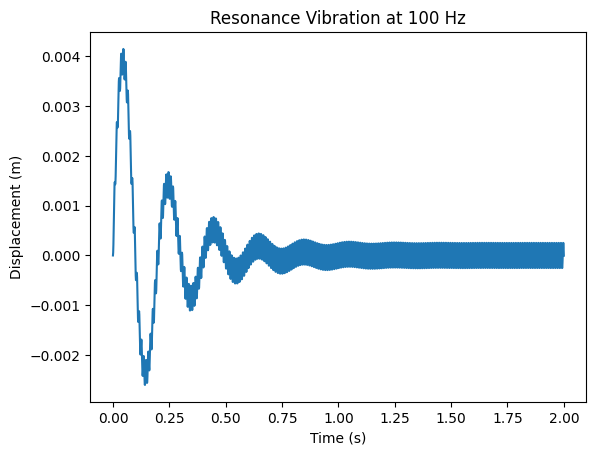

In [2]:
# Mechanical Resonance Simulator

import numpy as np
import matplotlib.pyplot as plt

# Spring-Mass-Damper system to simulate vibration
def simulate_resonance(mass, stiffness, damping, force_amplitude, duration, dt=0.001):
    n = int(duration / dt)
    x = np.zeros(n)
    v = np.zeros(n)

    for i in range(1, n):
        force = force_amplitude * np.sin(2 * np.pi * 100 * i * dt)  # 100 Hz driving force
        a = (force - damping * v[i-1] - stiffness * x[i-1]) / mass
        v[i] = v[i-1] + a * dt
        x[i] = x[i-1] + v[i] * dt

    return np.linspace(0, duration, n), x

# Parameters
mass = 0.01  # kg
stiffness = 10  # N/m
damping = 0.1  # Ns/m
force_amplitude = 1  # N

t, x = simulate_resonance(mass, stiffness, damping, force_amplitude, 2)

plt.plot(t, x)
plt.title("Resonance Vibration at 100 Hz")
plt.xlabel("Time (s)")
plt.ylabel("Displacement (m)")
plt.show()


Predicting Cell Response with Machine Learning


In [3]:
# ML Cell Response Predictor

import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models

# Generate Fake Dataset
X = np.random.rand(1000, 10, 10)  # 1000 scaffolds (10x10)
y = np.random.choice([0, 1], size=(1000,))  # 0 = no regeneration, 1 = regeneration

# Flatten input
X_flat = X.reshape((1000, -1))

# Build model
model = models.Sequential([
    layers.Dense(128, activation='relu', input_shape=(100,)),
    layers.Dense(64, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train
model.fit(X_flat, y, epochs=10, batch_size=32, validation_split=0.2)

# Predict on new scaffold
new_scaffold = np.random.rand(1, 10, 10).reshape((1, -1))
prediction = model.predict(new_scaffold)
print(f"Probability of Hair Cell Regeneration: {prediction[0][0]:.2f}")


Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - accuracy: 0.4793 - loss: 0.7135 - val_accuracy: 0.4950 - val_loss: 0.7198
Epoch 2/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5813 - loss: 0.6840 - val_accuracy: 0.5200 - val_loss: 0.7022
Epoch 3/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6088 - loss: 0.6694 - val_accuracy: 0.5000 - val_loss: 0.7069
Epoch 4/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6068 - loss: 0.6618 - val_accuracy: 0.5000 - val_loss: 0.7088
Epoch 5/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6637 - loss: 0.6436 - val_accuracy: 0.5350 - val_loss: 0.7169
Epoch 6/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6751 - loss: 0.6226 - val_accuracy: 0.4750 - val_loss: 0.7739
Epoch 7/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6053 - loss: 0.6564 - val_accuracy: 0.5100 - val_loss: 0.7148
Epoch 8/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6669 - loss: 0.6189 - val_accuracy: 0.5050 - val_loss: 0.7235
Ep